In [463]:
import pandas as pd
from datetime import datetime
import numpy as np
import json
import glob
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import json
import seaborn as sns
%matplotlib inline

Example of importing functions from txt file

In [464]:
import my_practice_module

In [465]:
my_practice_module.hello_world()

Hello World


In [466]:
list_of_file_names = glob.glob("./zip_2/*.csv")

In [467]:
read_data_list_2 = []
fail_list = []
for i, data in enumerate(list_of_file_names):
    try:
        data = pd.read_csv(data)
        #data = unicode(data, errors='replace')
        read_data_list_2.append(data)
    except UnicodeDecodeError:
        fail_list.append(i)
#read_data_list
#fail_list
list_of_file_names_org = list_of_file_names

In [468]:
fail_list

[3]

In [469]:
for x in fail_list:
    del list_of_file_names[x]

In [470]:
list_of_file_names[3]

'./zip_2/Zip_Listings_PriceCut_SeasAdj_AllHomes.csv'

In [471]:
# build loop for data we can work with. Only dates and zip
def build_useful_df(data_list):
    useful_df = []
    for dataset in range(len(data_list)):
        data = read_data_list_2[dataset]
        region_name = data['RegionName']
        region_name = region_name.astype(int)
        new_df = data.select_dtypes(include=['float64'])
        new_df.insert(loc=0, column='RegionName', value=region_name) 
        new_df = new_df.sort_values('RegionName',ascending=False)
        new_df = new_df.set_index('RegionName')
        useful_df.append(new_df)
    return useful_df

In [472]:
useful_df = build_useful_df(read_data_list_2)


In [473]:
len_list = []
for file in useful_df:
    file_2 = len(file)
    len_list.append(file_2)

In [229]:
len_list

[7296,
 10949,
 10949,
 10172,
 844,
 9597,
 7801,
 455,
 7301,
 156,
 1316,
 5045,
 2612,
 554,
 10131,
 1043,
 180,
 9830,
 145,
 1470,
 5366,
 2749,
 563,
 10521,
 1102,
 150,
 10066,
 7801,
 455,
 7301,
 823,
 1359,
 1083,
 174,
 15,
 2644,
 489,
 368,
 2354,
 1954,
 647,
 616,
 1134,
 946,
 145,
 8,
 2629,
 454,
 156,
 1906,
 1947,
 565,
 14829,
 12960,
 12960,
 10172,
 844,
 9597,
 15437,
 2485,
 10196,
 13275,
 10841,
 5558,
 15437,
 13927,
 13927,
 5645,
 15430,
 15430,
 15338,
 15437,
 15558,
 15558,
 15881,
 15881,
 15899,
 15899,
 8637,
 8635,
 15840,
 15840,
 14853]

In [512]:
sixteen_list = []
for i, file in enumerate(useful_df):
    if len(file) >= 10000:
        sixteen_list.append(i)

In [513]:
len(sixteen_list)

21

(array([ 19.,  11.,   4.,   5.,   0.,   0.,   3.,   1.,   0.,   5.,   2.,
          0.,   8.,   4.,   0.,   0.,   3.,   2.,   2.,  14.]),
 array([  8.00000000e+00,   8.02550000e+02,   1.59710000e+03,
          2.39165000e+03,   3.18620000e+03,   3.98075000e+03,
          4.77530000e+03,   5.56985000e+03,   6.36440000e+03,
          7.15895000e+03,   7.95350000e+03,   8.74805000e+03,
          9.54260000e+03,   1.03371500e+04,   1.11317000e+04,
          1.19262500e+04,   1.27208000e+04,   1.35153500e+04,
          1.43099000e+04,   1.51044500e+04,   1.58990000e+04]),
 <a list of 20 Patch objects>)

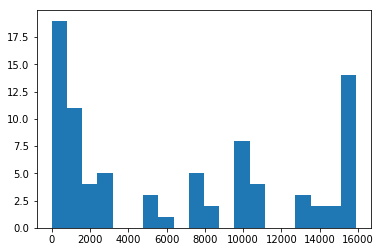

In [340]:
plt.hist(len_list, bins=20)

In [109]:
def build_feature_list(good_range, df_list):
    year_list = ['2011', '2012', '2013', '2014', '2015', '2016']
    feature_df_list = []
    bugs = []
    for num in good_range:
        df = df_list[num]
        try:
            df = df.loc[:, '1990-01':'2016-12']
            features = pd.DataFrame()
            for i, year in enumerate(year_list):
                mean = df.loc[:, year + '-01': year + '-12'].mean(axis=1)
                features[year + '_mean'] = mean
                std = df.loc[:, year + '-01': year + '-12'].std(axis=1)
                features[year + '_std'] = std
                mn = df.loc[:, year + '-01': year + '-12'].min(axis=1)
                features[year + '_min'] = mn
                mx = df.loc[:, year + '-01': year + '-12'].max(axis=1)
                features[year + '_max'] = mx
                features[year + '_swing'] = mx - mn
                change = df[year + '-12'] - df[year + '-01']
                features[year + '_change'] = change
                if i > 0:
                    yoy = features[year + '_mean'] / df.loc[:, year_list[i - 1] + '-01': year_list[i - 1] + '-12'].mean(axis=1)
                    features[year + '_yoy'] = yoy
                    features[year + '_gain'] = np.where(features[year + '_yoy']>1, 1, 0)
                    
                    #big swing and gain, big swing and loss, big swing and big gain, big swing and big loss
            feature_df_list.append(features)
        except:
            bugs.append(num)
    return feature_df_list, bugs

In [234]:
def build_feature_list_add(good_range, df_list, pure_feature_list):
    year_list = ['2011', '2012', '2013', '2014', '2015', '2016']
    feature_df_list = []
    bugs = []
    for feature in pure_feature_list:
        df = df_list[feature]
        feature_df_list.append(df)
    for num in good_range:
        df = df_list[num]
        try:
            df = df.loc[:, '2011-01':'2016-12']
            features = pd.DataFrame()
            for i, year in enumerate(year_list):
                mean = df.loc[:, year + '-01': year + '-12'].mean(axis=1)
                features[year + '_mean'] = mean
                std = df.loc[:, year + '-01': year + '-12'].std(axis=1)
                features[year + '_std'] = std
                mn = df.loc[:, year + '-01': year + '-12'].min(axis=1)
                features[year + '_min'] = mn
                mx = df.loc[:, year + '-01': year + '-12'].max(axis=1)
                features[year + '_max'] = mx
                features[year + '_swing'] = mx - mn
                change = df[year + '-12'] - df[year + '-01']
                features[year + '_change'] = change
                if i > 0:
                    yoy = features[year + '_mean'] / df.loc[:, year_list[i - 1] + '-01': year_list[i - 1] + '-12'].mean(axis=1)
                    features[year + '_yoy'] = yoy
                    features[year + '_gain'] = np.where(features[year + '_yoy']>1, 1, 0)
                    mean_yoy = features[year + '_yoy'].mean()
                    features[year + '_yoy_pos'] = np.where(features[year + '_yoy']>mean_yoy, 1, 0)
                    big_yoy = features[year + '_yoy'].std() + mean_yoy
                    features[year + '_yoy_big'] = np.where(features[year + '_yoy']>big_yoy, 1, 0)
                    features[year + '_yoy_neg'] = np.where(features[year + '_yoy']<mean_yoy, 1, 0)
                    big_loss = mean_yoy - features[year + '_yoy'].std() 
                    features[year + '_yoy_loss_big'] = np.where(features[year + '_yoy']<big_loss, 1, 0)
                mean_swing = features[year + '_swing'].mean()
                features[year + '_swing_pos'] = np.where(features[year + '_swing']>mean_swing, 1, 0)
                big_swing = features[year + '_swing'].std() + mean_swing
                features[year + '_swing_big'] = np.where(features[year + '_swing']>big_swing, 1, 0)
                features[year + '_swing_neg'] = np.where(features[year + '_swing']<mean_swing, 1, 0)
                swing_big_loss = mean_swing - features[year + '_swing'].std() 
                features[year + '_swing_loss_big'] = np.where(features[year + '_swing']<swing_big_loss, 1, 0)
                    
            feature_df_list.append(features)
        except:
            bugs.append(num)
    return feature_df_list, bugs

In [111]:
def build_feature_list_bugs(good_range, df_list):
    year_list = ['2011', '2012', '2013', '2014', '2015', '2016']
    feature_df_list = []
    bugs = []
    for num in good_range:
        df = df_list[num]
        df = df.loc[:, '2011-01':'2016-12']
        features = pd.DataFrame()
        for i, year in enumerate(year_list):
            try:
                mean = df.loc[:, year + '-01': year + '-12'].mean(axis=1)
                features[year + '_mean'] = mean
                std = df.loc[:, year + '-01': year + '-12'].std(axis=1)
                features[year + '_std'] = std
                mn = df.loc[:, year + '-01': year + '-12'].min(axis=1)
                features[year + '_min'] = mn
                mx = df.loc[:, year + '-01': year + '-12'].max(axis=1)
                features[year + '_max'] = mx
                features[year + '_swing'] = mx - mn
                change = df[year + '-12'] - df[year + '-01']
                features[year + '_change'] = change
                if i > 0:
                    yoy = features[year + '_mean'] / df.loc[:, year_list[i - 1] + '-01': year_list[i - 1] + '-12'].mean(axis=1)
                    features[year + '_yoy'] = yoy
                    features[year + '_gain'] = np.where(features[year + '_yoy']>1, 1, 0)
                    
                feature_df_list.append(features)
            except:
                mean = df.loc[:, year + '-01': year + '-12'].mean(axis=1)
                features[year + '_mean'] = mean
                std = df.loc[:, year + '-01': year + '-12'].std(axis=1)
                features[year + '_std'] = std
                mn = df.loc[:, year + '-01': year + '-12'].min(axis=1)
                features[year + '_min'] = mn
                mx = df.loc[:, year + '-01': year + '-12'].max(axis=1)
                features[year + '_max'] = mx
                features[year + '_swing'] = mx - mn
                #change = df[year + '-12'] - df[year + '-01']
                features[year + '_change'] = change
                if i > 0:
                    yoy = features[year + '_mean'] / df.loc[:, year_list[i - 1] + '-01': year_list[i - 1] + '-12'].mean(axis=1)
                    features[year + '_yoy'] = yoy
                    features[year + '_gain'] = np.where(features[year + '_yoy']>1, 1, 0)
                
                feature_df_list.append(features)
        #    bugs.append(num)
    return feature_df_list, bugs

In [475]:
def build_feature_list_swing(good_range, df_list):
    year_list = ['2011', '2012', '2013', '2014', '2015', '2016']
    feature_df_list = []
    bugs = []
    for num in good_range:
        df = df_list[num]
        try:
            df = df.loc[:, '2011-01':'2016-12']
            features = pd.DataFrame()
            for i, year in enumerate(year_list):
                mean = df.loc[:, year + '-01': year + '-12'].mean(axis=1)
                features[year + '_mean'] = mean
                std = df.loc[:, year + '-01': year + '-12'].std(axis=1)
                features[year + '_std'] = std
                mn = df.loc[:, year + '-01': year + '-12'].min(axis=1)
                features[year + '_min'] = mn
                mx = df.loc[:, year + '-01': year + '-12'].max(axis=1)
                features[year + '_max'] = mx
                features[year + '_swing'] = mx - mn
                change = df[year + '-12'] - df[year + '-01']
                features[year + '_change'] = change
                if i > 0:
                    yoy = features[year + '_mean'] / df.loc[:, year_list[i - 1] + '-01': year_list[i - 1] + '-12'].mean(axis=1)
                    features[year + '_yoy'] = yoy
                    features[year + '_gain'] = np.where(features[year + '_yoy']>1, 1, 0)
                    mean_yoy = features[year + '_yoy'].mean()
                    features[year + '_yoy_pos'] = np.where(features[year + '_yoy']>mean_yoy, 1, 0)
                    big_yoy = features[year + '_yoy'].std() + mean_yoy
                    features[year + '_yoy_big'] = np.where(features[year + '_yoy']>big_yoy, 1, 0)
                    features[year + '_yoy_neg'] = np.where(features[year + '_yoy']<mean_yoy, 1, 0)
                    big_loss = mean_yoy - features[year + '_yoy'].std() 
                    features[year + '_yoy_loss_big'] = np.where(features[year + '_yoy']<big_loss, 1, 0)
                mean_swing = features[year + '_swing'].mean()
                features[year + '_swing_pos'] = np.where(features[year + '_swing']>mean_swing, 1, 0)
                big_swing = features[year + '_swing'].std() + mean_swing
                features[year + '_swing_big'] = np.where(features[year + '_swing']>big_swing, 1, 0)
                features[year + '_swing_neg'] = np.where(features[year + '_swing']<mean_swing, 1, 0)
                swing_big_loss = mean_swing - features[year + '_swing'].std() 
                features[year + '_swing_loss_big'] = np.where(features[year + '_swing']<swing_big_loss, 1, 0)
            feature_df_list.append(features)
        except:
            bugs.append(num)
    return feature_df_list, bugs

In [476]:
len(useful_df)
for num in range(len(useful_df)):
    useful_df[num].dropna(inplace=True)

In [514]:
sixteen_doc_features, bugs = build_feature_list_swing(sixteen_list, useful_df)

In [515]:
len(bugs)

15

In [516]:
len(sixteen_doc_features)

6

In [344]:
list_of_file_names[77]

'./zip_2/Zip_Zri_AllHomesPlusMultifamily_Summary.csv'

In [345]:
# Docs that don't need feature engineering. They are already aggregates
pure_features = [0, 71, 75, 77, 79, 81]
sixteen_doc_features[1].head()

,2011_mean,2011_std,2011_min,2011_max,2011_swing,2011_change,2011_swing_pos,2011_swing_big,2011_swing_neg,2011_swing_loss_big,...,2016_yoy,2016_gain,2016_yoy_pos,2016_yoy_big,2016_yoy_neg,2016_yoy_loss_big,2016_swing_pos,2016_swing_big,2016_swing_neg,2016_swing_loss_big
RegionName,,,,,,,,,,,,,,,,,,,,,
99801,8.737707,2.668976,3.270054,12.457820,9.187766,-1.638298,0,0,1,0,...,0.854903,0,0,0,1,0,1,0,0,0
99709,15.292930,4.304947,9.545075,25.197773,15.652698,4.628867,1,1,0,0,...,1.046422,1,1,0,0,0,0,0,1,0
99705,14.771745,3.035814,9.219219,20.683859,11.464640,-0.895525,1,0,0,0,...,0.960138,0,0,0,1,0,1,0,0,0
99669,10.946112,1.839319,8.474595,14.084393,5.609798,-4.590275,0,0,1,1,...,1.177421,1,1,1,0,0,1,0,0,0
99654,13.307311,2.180717,8.626867,16.407887,7.781020,-2.413729,0,0,1,0,...,0.872533,0,0,0,1,0,0,0,1,0


In [517]:
len(sixteen_doc_features)
for num in range(len(sixteen_doc_features)):
    sixteen_doc_features[num].dropna(inplace=True)

In [237]:
bug_list

NameError: name 'bug_list' is not defined

In [487]:
# Merging all dfs into one. Merging on indez which is zipcode. I was hoping for inner join but it looks like
# There are many zipcodes that only exist in certain dfs. Im hoping that reducing them to metro areas will fix this
def merge_dataframes(feature_df_list):
    df_1 = feature_df_list[0]
    for df in feature_df_list[1:]:
        df_1 = pd.merge(df_1, df, left_index=True, right_index=True, how='inner')
    
    return df_1

In [518]:
X_16 = merge_dataframes(sixteen_doc_features)

In [519]:
X_16.dropna(inplace=True)

In [520]:
X_16.isnull().sum().sum()

0

In [521]:
X_16.head()

,2011_mean_x,2011_std_x,2011_min_x,2011_max_x,2011_swing_x,2011_change_x,2011_swing_pos_x,2011_swing_big_x,2011_swing_neg_x,2011_swing_loss_big_x,...,2016_yoy_y,2016_gain_y,2016_yoy_pos_y,2016_yoy_big_y,2016_yoy_neg_y,2016_yoy_loss_big_y,2016_swing_pos_y,2016_swing_big_y,2016_swing_neg_y,2016_swing_loss_big_y
RegionName,,,,,,,,,,,,,,,,,,,,,
99362,11.036472,1.492165,9.400227,14.401968,5.001741,-4.487889,0,0,1,1,...,0.992661,0,0,0,1,0,0,0,1,0
99354,11.603599,2.824071,7.194803,16.110267,8.915463,-1.600303,0,0,1,0,...,1.076721,1,1,1,0,0,0,0,1,0
99352,12.441976,1.441693,10.501647,14.742676,4.241029,2.483404,0,0,1,1,...,1.072472,1,1,1,0,0,0,0,1,0
99337,12.516044,1.241358,10.124885,14.400625,4.275740,-2.111852,0,0,1,1,...,1.064490,1,1,1,0,0,0,0,1,0
99336,11.792236,1.516523,8.975535,14.907430,5.931895,2.162776,0,0,1,1,...,1.070530,1,1,1,0,0,0,0,1,0


In [432]:
len(X_16)

4301

In [491]:
def create_y_ratio(df, col_1, col_2):
    y = pd.DataFrame()
    y['RegionName'] = df['RegionName']
    y['y'] = df[col_2] / df[col_1]
    y = y.sort_values('RegionName',ascending=False)
    y = y.set_index('RegionName')
    return y

In [522]:
y = create_y_ratio(read_data_list_2[23], '2016-12', '2017-12')

In [523]:
y.describe()

,y
count,10454.000000
mean,1.059853
std,0.081299
min,0.635848
25%,1.013011
50%,1.056295
75%,1.104116
max,1.438448


In [524]:
y.min()

y    0.635848
dtype: float64

ValueError: max must be larger than min in range parameter.

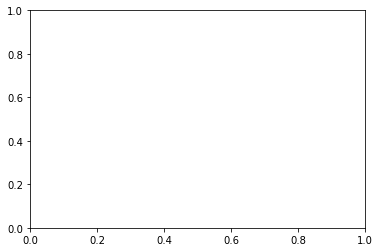

In [437]:
plt.hist(y_16)

In [494]:
def create_y_class(y_list):
    y_df = pd.DataFrame()
    y_1 = []
    y_2 = []
    y_3 = []
    y_4 = []
    y_5 = []
    y_6 = []
    y_7 = []
    for y in y_list:
        if y <= .75:
            y_1.append(1)
        else:
            y_1.append(0)
        if y > .75 and y <= .85:
            y_2.append(1)
        else:
            y_2.append(0)
        if y > .85 and y <= .95:
            y_3.append(1)
        else:
            y_3.append(0)
        if y > .95 and y <= 1.05:
            y_4.append(1)
        else:
            y_4.append(0)
        if y > 1.05 and y <= 1.15:
            y_5.append(1)
        else:
            y_5.append(0)
        if y > 1.15 and y <= 1.25:
            y_6.append(1)
        else:
            y_6.append(0)
        if y > 1.25:
            y_7.append(1)
        else:
            y_7.append(0)
    y_df['1'] = y_1
    y_df['2'] = y_2
    y_df['3'] = y_3
    y_df['4'] = y_4
    y_df['5'] = y_5
    y_df['6'] = y_6
    y_df['7'] = y_7
    return y_df

In [525]:
X_16_df = pd.merge(X_16, y, right_index=True, left_index=True, how='inner')

In [526]:
X_16 = X_16_df.iloc[:, :-1].values
y_16 = X_16_df.iloc[:, -1].values

In [527]:
#Weight 6 & 7 more? Also 1 & 2?
y_cat = create_y_class(y_16)
y_cat.head

<bound method NDFrame.head of       1  2  3  4  5  6  7
0     0  0  0  0  1  0  0
1     0  0  0  0  1  0  0
2     0  0  0  0  1  0  0
3     0  0  0  0  1  0  0
4     0  0  0  1  0  0  0
5     0  0  0  0  1  0  0
6     0  0  0  1  0  0  0
7     0  0  0  0  1  0  0
8     0  0  0  0  0  1  0
9     0  0  0  0  1  0  0
10    0  0  0  1  0  0  0
11    0  0  0  0  0  1  0
12    0  0  0  0  0  1  0
13    0  0  0  1  0  0  0
14    0  0  0  0  1  0  0
15    0  0  0  0  1  0  0
16    0  0  0  1  0  0  0
17    0  0  0  0  0  1  0
18    0  0  0  1  0  0  0
19    0  0  0  0  1  0  0
20    0  0  0  0  0  1  0
21    0  0  0  1  0  0  0
22    0  0  0  0  0  0  0
23    0  0  0  0  1  0  0
24    0  0  0  1  0  0  0
25    0  0  0  1  0  0  0
26    0  0  0  0  1  0  0
27    0  0  0  0  0  1  0
28    0  0  0  0  1  0  0
29    0  0  0  0  0  1  0
...  .. .. .. .. .. .. ..
5108  0  0  0  0  0  1  0
5109  0  0  0  0  1  0  0
5110  0  0  0  0  1  0  0
5111  0  0  0  0  0  0  1
5112  0  0  0  0  0  1  0
5113  0 

In [528]:
X_16_df['y'].describe()

count    5129.000000
mean        1.067475
std         0.072273
min         0.791820
25%         1.023399
50%         1.061971
75%         1.106317
max         1.425089
Name: y, dtype: float64

In [397]:
X_16.max()

13331.838146306203

In [330]:
X_16[:, 3]

array([ 1.62726008,  1.62726008,  1.62726008, ...,  8.37273992,
        8.37273992,  8.37273992])

In [310]:
X_16[:, 3].max()

10.0

In [311]:
test = X_16[:, 3].max()
X_16[:, 3] / test

array([ 0.16272601,  0.16272601,  0.16272601, ...,  0.83727399,
        0.83727399,  0.83727399])

In [297]:
test = X_16.shape
test[1]

562

In [498]:
def norm_per_column(X):
    new_array = []
    shape = X.shape
    columns = shape[1]
    for num in range(columns):
        mx = X[:, num].max()
        if mx == 0:
            new_array.append(X[:, num])
        else:
            X[:, num] = X[:, num] / mx
            new_array.append(X[:, num])
    new_array = np.array(new_array)
    new_array = np.transpose(new_array)
    return new_array

In [529]:
X_16 = norm_per_column(X_16)

In [452]:
X_16 = np.array(X_16)

In [454]:
X_16 = np.transpose(X_16)

In [530]:
X_16.shape

(5138, 540)

In [531]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X_16, y_cat, test_size= .2)

In [534]:
# Best by far! Same as linear but converted to be categorical
model = Sequential()
model.add(Dense(3000, input_shape=(540,), activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))
sgd = keras.optimizers.SGD(lr=0.75)
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [535]:
model.fit(x=X_train_16, y=y_train_16, 
          batch_size=2500, 
          epochs=100, 
          verbose=1, 
          validation_data=(X_test_16, y_test_16),
          callbacks=None)

Train on 4110 samples, validate on 1028 samples
Epoch 1/100
4110/4110 [==============================] - 12s 3ms/step - loss: 1.8075 - acc: 0.4701 - val_loss: 2.1506 - val_acc: 0.3794
Epoch 2/100
4110/4110 [==============================] - 6s 1ms/step - loss: 1.7725 - acc: 0.3798 - val_loss: 1.2996 - val_acc: 0.4591
Epoch 3/100
4110/4110 [==============================] - 6s 1ms/step - loss: 1.2729 - acc: 0.4701 - val_loss: 1.2521 - val_acc: 0.4591
Epoch 4/100
4110/4110 [==============================] - 6s 1ms/step - loss: 1.2132 - acc: 0.4701 - val_loss: 1.1988 - val_acc: 0.4591
Epoch 5/100
4110/4110 [==============================] - 6s 1ms/step - loss: 1.1711 - acc: 0.4771 - val_loss: 1.1815 - val_acc: 0.5010
Epoch 6/100
4110/4110 [==============================] - 6s 1ms/step - loss: 1.1447 - acc: 0.4964 - val_loss: 1.1678 - val_acc: 0.4591
Epoch 7/100
4110/4110 [==============================] - 6s 1ms/step - loss: 1.1343 - acc: 0.4703 - val_loss: 1.1651 - val_acc: 0.4591
Epoch 

Epoch 61/100
4110/4110 [==============================] - 6s 2ms/step - loss: 0.4793 - acc: 0.8251 - val_loss: 1.4504 - val_acc: 0.4912
Epoch 62/100
4110/4110 [==============================] - 6s 2ms/step - loss: 0.4969 - acc: 0.7993 - val_loss: 1.5623 - val_acc: 0.4718
Epoch 63/100
4110/4110 [==============================] - 6s 1ms/step - loss: 0.6027 - acc: 0.7380 - val_loss: 1.4871 - val_acc: 0.4942
Epoch 64/100
4110/4110 [==============================] - 6s 1ms/step - loss: 0.4154 - acc: 0.8467 - val_loss: 1.5715 - val_acc: 0.4903
Epoch 65/100
4110/4110 [==============================] - 6s 2ms/step - loss: 0.4311 - acc: 0.8345 - val_loss: 1.5686 - val_acc: 0.4903
Epoch 66/100
4110/4110 [==============================] - 6s 1ms/step - loss: 0.4179 - acc: 0.8304 - val_loss: 1.4935 - val_acc: 0.4893
Epoch 67/100
4110/4110 [==============================] - 6s 2ms/step - loss: 0.3388 - acc: 0.8949 - val_loss: 1.6918 - val_acc: 0.5000
Epoch 68/100
4110/4110 [========================

In [ ]:
# .9810

In [458]:
model = Sequential()
model.add(Dense(256, input_shape=(811,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(7, activation='softmax'))
learning_rate = .001
epochs = 20
decay_rate = learning_rate / epochs
momentum = 0.5
sgd = keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
             metrics=['accuracy'])

In [459]:
class_weight = {1: 10,
    2: 5,
    3: 1,
    4: 1,
    5: 1,
    6: 5,
                7:10}
model.fit(x=X_train_16, y=y_train_16, 
          batch_size=3000, 
          epochs=epochs, 
          verbose=1, 
          validation_data=(X_test_16, y_test_16),
          callbacks=None)

Train on 3292 samples, validate on 824 samples
Epoch 1/20
3292/3292 [==============================] - 8s 2ms/step - loss: nan - acc: 0.0826 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/20
3292/3292 [==============================] - 4s 1ms/step - loss: nan - acc: 0.0024 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/20
3292/3292 [==============================] - 4s 1ms/step - loss: nan - acc: 0.0024 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/20
3292/3292 [==============================] - 4s 1ms/step - loss: nan - acc: 0.0024 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/20
3292/3292 [==============================] - 4s 1ms/step - loss: nan - acc: 0.0024 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/20
3292/3292 [==============================] - 4s 1ms/step - loss: nan - acc: 0.0024 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/20
3292/3292 [==============================] - 5s 2ms/step - loss: nan - acc: 0.0024 - val_loss: nan - val_acc: 0.0000e+00
Epoch 8/20
3292/3292 [=======

KeyboardInterrupt: 

In [557]:
model = Sequential()
model.add(Dense(64, input_shape=(90,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))
sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [558]:
model.fit(x=X_train_s, y=y_train_s, 
          batch_size=2500, 
          epochs=2000, 
          verbose=1, 
          validation_data=(X_test_s, y_test_s),
          callbacks=None)

Train on 5336 samples, validate on 1334 samples
Epoch 1/2000
5336/5336 [==============================] - 5s 906us/step - loss: 1.0742 - val_loss: 0.8664
Epoch 2/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.8218 - val_loss: 0.6511
Epoch 3/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.6200 - val_loss: 0.4853
Epoch 4/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.4641 - val_loss: 0.3586
Epoch 5/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.3450 - val_loss: 0.2620
Epoch 6/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.2540 - val_loss: 0.1897
Epoch 7/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.1856 - val_loss: 0.1357
Epoch 8/2000
5336/5336 [==============================] - 3s 491us/step - loss: 0.1340 - val_loss: 0.0961
Epoch 9/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0967 - val_loss: 0.067

5336/5336 [==============================] - 3s 484us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 154/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0055 - val_loss: 0.0049
Epoch 155/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 156/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 157/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 158/2000
5336/5336 [==============================] - 3s 497us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 159/2000
5336/5336 [==============================] - 3s 499us/step - loss: 0.0055 - val_loss: 0.0049
Epoch 160/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 161/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0056 - val_loss: 0.0049
Epoch 162/2000
5336/5336 [=================

Epoch 229/2000
5336/5336 [==============================] - 3s 490us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 230/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 231/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0049
Epoch 232/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 233/2000
5336/5336 [==============================] - 3s 499us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 234/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 235/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 236/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 237/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 238/2000
5336/5336 [==

Epoch 305/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 306/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 307/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 308/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 309/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 310/2000
5336/5336 [==============================] - 3s 492us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 311/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 312/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 313/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 314/2000
5336/5336 [==

Epoch 381/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 382/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 383/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 384/2000
5336/5336 [==============================] - 3s 496us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 385/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 386/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 387/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 388/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 389/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 390/2000
5336/5336 [==

Epoch 457/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 458/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 459/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 460/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 461/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 462/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 463/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 464/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 465/2000
5336/5336 [==============================] - 3s 495us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 466/2000
5336/5336 [==

Epoch 533/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 534/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 535/2000
5336/5336 [==============================] - 3s 497us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 536/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 537/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 538/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 539/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 540/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 541/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 542/2000
5336/5336 [==

Epoch 609/2000
5336/5336 [==============================] - 3s 517us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 610/2000
5336/5336 [==============================] - 3s 592us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 611/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 612/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 613/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 614/2000
5336/5336 [==============================] - 3s 519us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 615/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 616/2000
5336/5336 [==============================] - 3s 510us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 617/2000
5336/5336 [==============================] - 3s 490us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 618/2000
5336/5336 [==

Epoch 685/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 686/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 687/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 688/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 689/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 690/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 691/2000
5336/5336 [==============================] - 3s 491us/step - loss: 0.0056 - val_loss: 0.0048
Epoch 692/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 693/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 694/2000
5336/5336 [==

Epoch 761/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0048
Epoch 762/2000
5336/5336 [==============================] - 3s 513us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 763/2000
5336/5336 [==============================] - 3s 553us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 764/2000
5336/5336 [==============================] - 3s 557us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 765/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 766/2000
5336/5336 [==============================] - 3s 523us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 767/2000
5336/5336 [==============================] - 3s 528us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 768/2000
5336/5336 [==============================] - 3s 516us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 769/2000
5336/5336 [==============================] - 3s 509us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 770/2000
5336/5336 [==

Epoch 837/2000
5336/5336 [==============================] - 3s 491us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 838/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 839/2000
5336/5336 [==============================] - 3s 492us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 840/2000
5336/5336 [==============================] - 3s 495us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 841/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 842/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 843/2000
5336/5336 [==============================] - 3s 520us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 844/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 845/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 846/2000
5336/5336 [==

Epoch 913/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 914/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 915/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 916/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 917/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 918/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 919/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 920/2000
5336/5336 [==============================] - 3s 497us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 921/2000
5336/5336 [==============================] - 3s 490us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 922/2000
5336/5336 [==

Epoch 989/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 990/2000
5336/5336 [==============================] - 3s 499us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 991/2000
5336/5336 [==============================] - 3s 496us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 992/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 993/2000
5336/5336 [==============================] - 3s 497us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 994/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 995/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 996/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 997/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 998/2000
5336/5336 [==

5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1140/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1141/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1142/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1143/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1144/2000
5336/5336 [==============================] - 3s 499us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1145/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1146/2000
5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1147/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0056 - val_loss: 0.0047
Epoch 1148/2000
5336/5336 [========

5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1290/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1291/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1292/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1293/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1294/2000
5336/5336 [==============================] - 3s 496us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1295/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1296/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1297/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1298/2000
5336/5336 [========

5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1440/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1441/2000
5336/5336 [==============================] - 3s 491us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1442/2000
5336/5336 [==============================] - 3s 482us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1443/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1444/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1445/2000
5336/5336 [==============================] - 3s 491us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1446/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1447/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1448/2000
5336/5336 [========

5336/5336 [==============================] - 3s 490us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1590/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1591/2000
5336/5336 [==============================] - 3s 481us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1592/2000
5336/5336 [==============================] - 3s 490us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1593/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1594/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1595/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1596/2000
5336/5336 [==============================] - 3s 493us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1597/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1598/2000
5336/5336 [========

5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1740/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1741/2000
5336/5336 [==============================] - 3s 494us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1742/2000
5336/5336 [==============================] - 3s 495us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1743/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1744/2000
5336/5336 [==============================] - 3s 490us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1745/2000
5336/5336 [==============================] - 3s 485us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1746/2000
5336/5336 [==============================] - 3s 499us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1747/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1748/2000
5336/5336 [========

5336/5336 [==============================] - 3s 483us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1890/2000
5336/5336 [==============================] - 3s 486us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1891/2000
5336/5336 [==============================] - 3s 484us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1892/2000
5336/5336 [==============================] - 3s 487us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1893/2000
5336/5336 [==============================] - 3s 497us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1894/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1895/2000
5336/5336 [==============================] - 3s 489us/step - loss: 0.0054 - val_loss: 0.0047
Epoch 1896/2000
5336/5336 [==============================] - 3s 488us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1897/2000
5336/5336 [==============================] - 3s 501us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 1898/2000
5336/5336 [========

In [89]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split(X_16, y_16, test_size= .2)

In [726]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size= .3)

In [136]:
y_16

array([ 1.05329405,  1.12662344,  1.08065202, ...,  0.99302723,
        1.0074516 ,  1.07181999])

In [135]:
X_16_df

array([[  1.20542047e-04,   2.94347206e-06,   1.17223911e-04, ...,
          1.01317123e-07,   1.00573546e-05,   0.00000000e+00],
       [  1.08620399e-04,   2.74134129e-06,   1.05876393e-04, ...,
          2.02634245e-07,   1.09090230e-05,   1.01317123e-05],
       [  1.15501520e-04,   3.06397696e-06,   1.13069909e-04, ...,
          2.22897670e-07,   1.08659813e-05,   1.01317123e-05],
       ..., 
       [  1.01148261e-04,   2.54756143e-06,   9.73657548e-05, ...,
          4.45795339e-07,   1.02013002e-05,   1.01317123e-05],
       [  1.45533604e-04,   5.09203118e-06,   1.37689970e-04, ...,
          9.72644377e-07,   1.07722709e-05,   1.01317123e-05],
       [  1.06779804e-04,   4.98123265e-06,   1.02026342e-04, ...,
          2.43161094e-07,   1.02495897e-05,   1.01317123e-05]])

In [528]:
.0055 ** .5

0.07416198487095663

In [510]:
# New datasets
model = Sequential()
model.add(Dense(64, input_shape=(690,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))
# best lr .02
sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [341]:
# New datasets
model = Sequential()
model.add(Dense(64, input_shape=(1350,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
# Added
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))
# best lr .005
sgd = keras.optimizers.SGD(lr=0.005)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [729]:
# New datasets
model = Sequential()
model.add(Dense(64, input_shape=(690,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
# Added
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))
# best lr .005
sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [732]:
model.fit(x=X_train_2, y=y_train_2, 
          batch_size=2500, 
          epochs=30, 
          verbose=1, 
          validation_data=(X_test_2, y_test_2),
          callbacks=None)



Train on 203 samples, validate on 88 samples
Epoch 1/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0048
Epoch 2/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 3/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 4/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0047
Epoch 5/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 6/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 7/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0048
Epoch 8/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 9/30
203/203 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 10/30
203/203 [==============================] - 

KeyboardInterrupt: 

In [311]:
# Without new features
root = .0040 ** .5
# .071
root

In [417]:
X_16['y'].describe()

count    2400.000000
mean        1.066686
std         0.065818
min         0.831398
25%         1.024956
50%         1.061385
75%         1.101586
max         1.425089
Name: y, dtype: float64

In [561]:
# new datasets with new features (big swing)
model = Sequential()
model.add(Dense(64, input_shape=(450,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='relu'))

sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [562]:
model.fit(x=X_train_sm, y=y_train_sm, 
          batch_size=2500, 
          epochs=2000, 
          verbose=1, 
          validation_data=(X_test_sm, y_test_sm),
          callbacks=None)



Train on 2186 samples, validate on 547 samples
Epoch 1/2000
2186/2186 [==============================] - 3s 2ms/step - loss: 1.1054 - val_loss: 1.0352
Epoch 2/2000
2186/2186 [==============================] - 1s 502us/step - loss: 1.0320 - val_loss: 0.9584
Epoch 3/2000
2186/2186 [==============================] - 1s 519us/step - loss: 0.9561 - val_loss: 0.8839
Epoch 4/2000
2186/2186 [==============================] - 1s 496us/step - loss: 0.8826 - val_loss: 0.8130
Epoch 5/2000
2186/2186 [==============================] - 1s 498us/step - loss: 0.8131 - val_loss: 0.7462
Epoch 6/2000
2186/2186 [==============================] - 1s 506us/step - loss: 0.7475 - val_loss: 0.6837
Epoch 7/2000
2186/2186 [==============================] - 1s 508us/step - loss: 0.6858 - val_loss: 0.6255
Epoch 8/2000
2186/2186 [==============================] - 1s 505us/step - loss: 0.6284 - val_loss: 0.5714
Epoch 9/2000
2186/2186 [==============================] - 1s 500us/step - loss: 0.5750 - val_loss: 0.5213
E

Epoch 78/2000
2186/2186 [==============================] - 1s 493us/step - loss: 0.0043 - val_loss: 0.0035
Epoch 79/2000
2186/2186 [==============================] - 1s 491us/step - loss: 0.0043 - val_loss: 0.0035
Epoch 80/2000
2186/2186 [==============================] - 1s 492us/step - loss: 0.0042 - val_loss: 0.0035
Epoch 81/2000
2186/2186 [==============================] - 1s 489us/step - loss: 0.0042 - val_loss: 0.0035
Epoch 82/2000
2186/2186 [==============================] - 1s 493us/step - loss: 0.0043 - val_loss: 0.0035
Epoch 83/2000
2186/2186 [==============================] - 1s 492us/step - loss: 0.0041 - val_loss: 0.0035
Epoch 84/2000
2186/2186 [==============================] - 1s 493us/step - loss: 0.0043 - val_loss: 0.0036
Epoch 85/2000
2186/2186 [==============================] - 1s 508us/step - loss: 0.0042 - val_loss: 0.0036
Epoch 86/2000
2186/2186 [==============================] - 1s 499us/step - loss: 0.0042 - val_loss: 0.0036
Epoch 87/2000
2186/2186 [============

KeyboardInterrupt: 

In [563]:
# new datasets with new features (big swing) and new layers
model = Sequential()
model.add(Dense(64, input_shape=(450,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dense(4000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))

sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [ ]:
model.fit(x=X_train_sm, y=y_train_sm, 
          batch_size=2500, 
          epochs=2000, 
          verbose=1, 
          validation_data=(X_test_sm, y_test_sm),
          callbacks=None)

Train on 2186 samples, validate on 547 samples
Epoch 1/2000
2186/2186 [==============================] - 9s 4ms/step - loss: 1.1104 - val_loss: 1.0365
Epoch 2/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 1.0305 - val_loss: 0.9589
Epoch 3/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.9543 - val_loss: 0.8822
Epoch 4/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.8791 - val_loss: 0.8091
Epoch 5/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.8070 - val_loss: 0.7405
Epoch 6/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.7393 - val_loss: 0.6766
Epoch 7/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.6760 - val_loss: 0.6172
Epoch 8/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.6172 - val_loss: 0.5622
Epoch 9/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.5626 - val_loss: 0.5114
Epoch 10/2000
218

Epoch 79/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 80/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 81/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 82/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 83/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 84/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 85/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 86/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 87/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 88/2000
2186/2186 [==============================

Epoch 157/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 158/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 159/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 160/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 161/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 162/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 163/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 164/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 165/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 166/2000
2186/2186 [====================

Epoch 235/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 236/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 237/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 238/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 239/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 240/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 241/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 242/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 243/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 244/2000
2186/2186 [====================

Epoch 313/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 314/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 315/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 316/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 317/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 318/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 319/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 320/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 321/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 322/2000
2186/2186 [====================

Epoch 391/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 392/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 393/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 394/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 395/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 396/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 397/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 398/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 399/2000
2186/2186 [==============================] - 6s 3ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 400/2000
2186/2186 [====================

In [ ]:
# new datasets with new features (big swing) and new layers
model = Sequential()
model.add(Dense(64, input_shape=(450,), activation='relu'))
model.add(Dropout(.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(2000, activation='relu'))
model.add(Dense(4000, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(1, activation='linear'))

sgd = keras.optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

In [ ]:
model.fit(x=X_train_sm, y=y_train_sm, 
          batch_size=2500, 
          epochs=2000, 
          verbose=1, 
          validation_data=(X_test_sm, y_test_sm),
          callbacks=None)